<a id = "Sommaire"></a>
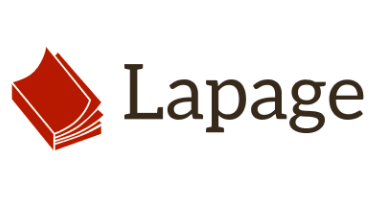

<html><font color="brown", size = "+3"><strong><u> Sommaire </u></strong></font></html>

<ul>
<a  href = "#0">Import des librairies</a><br>
<a  href = "#I">I. Exploration, nettoyage</a>
    <ul>
    <li><a  href = "#customers">1.1 Fichier customers</a></li>
    <li><a  href = "#products">1.2 Fichier products </a></li>
    <li><a  href = "#transactions">1.3 Fichier transactions</a></li>
    <li><a  href = "#rapprochement">1.4 Rapprochement entre fichiers</a></li>        
    </ul>
<a href = "#II">II. analyse des différents indicateurs de vente</a>
    <ul>
    <li><a  href = "#ca_temps">2.1 Évolution du CA dans le temps</a></li>
    <li><a  href = "#ca_repartition">2.2 répartition du CA </a></li>
    <li><a  href = "#ca_graphique">2.3 Courbe de Lorenz </a></li>
    </ul>
<a  href = "#III">III. Analyse plus ciblée sur les clients: Comprendre leurs comportements en ligne :
</a>
    <ul>
    <li><a  href = "#corr_genre_categorie">3.1 Corrélation entre le genre d’un client et les catégories des livres achetés</a></li>
    <li><a href = "#corr_age_montant">3.2 Corrélation entre l'äge d’un client et le montant total des achats</a></li>
    <li><a  href = "#corr_age_frequence">3.3 Corrélation entre l'äge d’un client et la fréquence d’achat</a></li>
    <li><a  href = "#corr_age_panier">3.4 Corrélation entre l'äge d’un client et la taille du panier moyen </a></li>
    <li><a  href = "#corr_age_achat">3.5 Corrélation entre l'äge d’un client et les catégories des livres achetés </a></li> 
    <li><a  href = "#proba">3.6 Calcule de probabilité: </a></li> 
          
<a  href = "#conclusion">Conclusion</a>


<a id = "0"></a>
<html><font color='brown', size = "+3"><strong><u> Import des librairies </u></strong></font></html>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbk
import datetime
#from scipy.stats import chi2_contingency as st
import scipy.stats as st
#from scipy.stats import pearsonr 
#from scipy.stats import ttest_ind

# import matplotlib

from scipy.stats import normaltest

<a id = "I"></a>
<html><font color='brown', size = "+3"><strong><u> I . Exploration, nettoyage des fichiers</u></strong></font></html>

<a id = "customers"></a>
<html><font color='#c97144', size = "+1.5"><strong>1.1 Fichier customers </strong></font></html>

In [3]:
df_customers = pd.read_csv("customers.csv")
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


## Changer le type sex to category

In [5]:
df_customers['sex'] = df_customers['sex'].astype('category')

In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   client_id  8623 non-null   object  
 1   sex        8623 non-null   category
 2   birth      8623 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 143.4+ KB


### Changer le nom sex en genre

In [7]:
df_customers.rename(columns={"sex":"genre"}, inplace = True)

### Vérification des doublons 

In [8]:
doublons_df_customers = df_customers.duplicated()
doublons_df_customers.value_counts()


False    8623
dtype: int64

### Attribut age

In [9]:
df_customers['age']=datetime.date.today().year - df_customers['birth'] 

In [10]:
df_customers

,client_id,genre,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78
...,...,...,...,...
8618,c_7920,m,1956,65
8619,c_7403,f,1970,51
8620,c_5119,m,1974,47
8621,c_5643,f,1968,53


In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   client_id  8623 non-null   object  
 1   genre      8623 non-null   category
 2   birth      8623 non-null   int64   
 3   age        8623 non-null   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 210.8+ KB


### Projection client_id, genre et age

In [12]:
df_customers_F = df_customers.loc[:,["client_id", "genre", "age"]]

In [13]:
df_customers_F

,client_id,genre,age
0,c_4410,f,54
1,c_7839,f,46
2,c_1699,f,37
3,c_5961,f,59
4,c_5320,m,78
...,...,...,...
8618,c_7920,m,65
8619,c_7403,f,51
8620,c_5119,m,47
8621,c_5643,f,53


In [14]:
df_customers_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   client_id  8623 non-null   object  
 1   genre      8623 non-null   category
 2   age        8623 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 143.4+ KB


<a id = "products"></a>
<html><font color='#c97144', size = "+1.5"><strong>1.2 Fichier products </strong></font></html>

In [15]:
df_products = pd.read_csv("products.csv")
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [16]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [17]:
# Changer le type categ to category
df_products['categ'] = df_products['categ'].astype('category')

### Valeurs de la variable "categ"

In [18]:
print(df_products["categ"].unique())
df_products["categ"].value_counts()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]


0    2309
1     739
2     239
Name: categ, dtype: int64

### Recherche des prix négatifs

In [19]:
#une valeur concernée
df_products[df_products["price"]<0]

,id_prod,price,categ
731,T_0,-1.0,0


In [20]:
#Nettoyage de la ligne concernée
df_products.drop(index = 731,inplace= True)

### Renomer la colonne price en prix

In [21]:
df_products_F = df_products.rename(columns={"price":"prix"})

In [22]:
df_products_F

,id_prod,prix,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


### Nombre de valeurs nulles

In [23]:
df_products_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id_prod  3286 non-null   object  
 1   prix     3286 non-null   float64 
 2   categ    3286 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 80.4+ KB


### Nombre de doublons du dataframe products

In [24]:
df_doublons_products = df_products_F.duplicated()
df_doublons_products.value_counts()

False    3286
dtype: int64

In [25]:
# Nombre de valeurs distinctes de id_product
df_products_F.nunique(axis=0)

id_prod    3286
prix       1454
categ         3
dtype: int64

## Dispertion des prix de produits par categorie

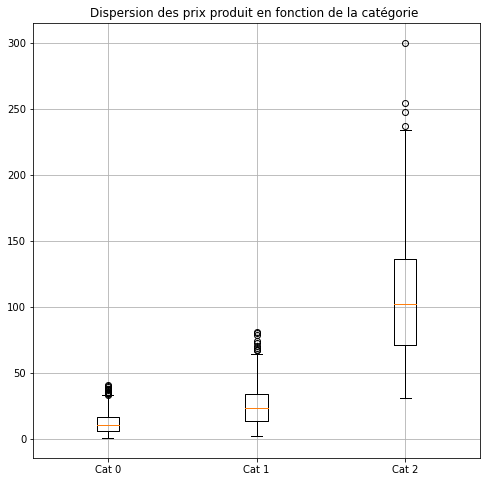

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.boxplot(df_products_F[df_products_F["categ"] == 0]["prix"].values, positions=[1])
ax.boxplot(df_products_F[df_products_F["categ"] == 1]["prix"].values, positions=[2])
ax.boxplot(df_products_F[df_products_F["categ"] == 2]["prix"].values, positions=[3])
ax.set_title("Dispersion des prix produit en fonction de la catégorie ")
ax.set_xticklabels(['Cat 0', 'Cat 1', 'Cat 2'])
ax.grid(True)
plt.show()

<a id = "transactions"></a>
<html><font color='#c97144', size = "+1.5"><strong>1.3 Fichier transactions </strong></font></html>

In [27]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [28]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


<li style="color:red;"> Comment vérifier l'unicité de clè composé ( id_prod,  client_id, session_id )  ?</li>

In [29]:
df_transactions.nunique(axis=0)
# 20 produits aucune transaction 3287 - 3267 = 20

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

<h2 style="color:Blue;"> Traitement des Dates </h2>

#### Supprimer les millisecondes

In [30]:
# df_transactions['date'].replace(regex=True,inplace=True,to_replace=r'\.+[0-9]{6}',value=r'')

<ul style="color:Blue;">
<li> Récuperer les enregistrements qui commencent par test_ du champs date </li>
<li> Copier le résultat dans un nouveau dataframe df_transactions_temp</li>
</ul>

In [31]:
df_transactions_temp = df_transactions[df_transactions.date.str.contains('^test_')]

In [32]:
df_transactions_temp

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


## Dataframe df_transactions_F

In [33]:
# Supprimer les enregistrements dont la date commence par test_
df_transactions_F = pd.concat([df_transactions,df_transactions_temp]).drop_duplicates(keep=False)

In [34]:
df_transactions_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [35]:
#Conersion du type à datetime de l'attribut date
df_transactions_F['date'] = pd.to_datetime(df_transactions_F['date'])

In [36]:
df_transactions_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [37]:
df_transactions_F.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [38]:
df_transactions_F.sort_values('date', ascending = False) 

,id_prod,date,session_id,client_id
84274,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575
550455,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848
130172,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
588183,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
184649,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
...,...,...,...,...
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664


### Extraire l'année le mois et le jour du champs date

In [39]:

df_transactions_F['année'] = df_transactions_F['date'].dt.year 
df_transactions_F['mois'] = df_transactions_F['date'].dt.month 
df_transactions_F['jour'] = df_transactions_F['date'].dt.day 
df_transactions_F['heure'] = df_transactions_F['date'].dt.hour

In [40]:
df_transactions_F.head()

,id_prod,date,session_id,client_id,année,mois,jour,heure
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,13
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2,7
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,15
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,24,4
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,11,8


In [41]:
df_transactions_F['année_mois_jour'] = df_transactions_F["date"].dt.strftime('%Y-%m-%d')
df_transactions_F['année_mois'] = df_transactions_F["date"].dt.strftime('%Y-%m')

In [42]:
df_transactions_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679332 non-null  object        
 1   date             679332 non-null  datetime64[ns]
 2   session_id       679332 non-null  object        
 3   client_id        679332 non-null  object        
 4   année            679332 non-null  int64         
 5   mois             679332 non-null  int64         
 6   jour             679332 non-null  int64         
 7   heure            679332 non-null  int64         
 8   année_mois_jour  679332 non-null  object        
 9   année_mois       679332 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 57.0+ MB


In [43]:
df_transactions_F

,id_prod,date,session_id,client_id,année,mois,jour,heure,année_mois_jour,année_mois
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,13,2022-05-20,2022-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2,7,2022-02-02,2022-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,15,2022-06-18,2022-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,24,4,2021-06-24,2021-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,11,8,2023-01-11,2023-01
...,...,...,...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022,1,15,13,2022-01-15,2022-01
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022,3,19,16,2022-03-19,2022-03
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022,12,20,4,2022-12-20,2022-12
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021,7,16,20,2021-07-16,2021-07


## Dataframe df_transactions_test

In [44]:
df_transactions_test = df_transactions_temp

In [45]:
# df_transactions_test Supprimer test du debut du champs date
df_transactions_test['date'].replace(regex=True,inplace=True,to_replace=r'^test_',value=r'')

C:\Users\Sihamino\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [46]:
#Conersion du type à datetime de l'attribut date
df_transactions_test['date'] = pd.to_datetime(df_transactions_test['date'])

<ipython-input-46-cffc88d8a596>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_test['date'] = pd.to_datetime(df_transactions_test['date'])


In [47]:
df_transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 3019 to 679180
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     200 non-null    object        
 1   date        200 non-null    datetime64[ns]
 2   session_id  200 non-null    object        
 3   client_id   200 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.8+ KB


In [48]:
# Vérification de la modification
df_transactions_test.head()

,id_prod,date,session_id,client_id
3019,T_0,2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,2021-03-01 02:30:02.237430,s_0,ct_0


In [49]:
# Compter le nombre de differentes dates distinctes
df_transactions_test['date'].value_counts 

<bound method IndexOpsMixin.value_counts of 3019     2021-03-01 02:30:02.237419
5138     2021-03-01 02:30:02.237425
9668     2021-03-01 02:30:02.237437
10728    2021-03-01 02:30:02.237436
15292    2021-03-01 02:30:02.237430
                    ...            
657830   2021-03-01 02:30:02.237417
662081   2021-03-01 02:30:02.237427
670680   2021-03-01 02:30:02.237449
671647   2021-03-01 02:30:02.237424
679180   2021-03-01 02:30:02.237425
Name: date, Length: 200, dtype: datetime64[ns]>

<h3 style="color:red;"> Les clients et produits sur les quels le test était fait</h3>

In [50]:
#  les clients concernés par le test
df_transactions_test['client_id'].unique()

array(['ct_0', 'ct_1'], dtype=object)

In [51]:
# Les produits
df_transactions_test['id_prod'].unique()

array(['T_0'], dtype=object)

### Le test était pour les clients ct_0 et ct_1 sur le produit T_0

<a id = "rapprochement"></a>
<html><font color='#c97144', size = "+1.5"><strong>1.4 Raprochement entre fichiers </strong></font></html>

## merge df_transactions_F et df_products_F  ===> df_trans_prod

In [52]:
df_trans_prod = pd.merge(df_transactions_F, df_products_F, on ="id_prod", how = "left")

In [53]:
df_trans_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679332 non-null  object        
 1   date             679332 non-null  datetime64[ns]
 2   session_id       679332 non-null  object        
 3   client_id        679332 non-null  object        
 4   année            679332 non-null  int64         
 5   mois             679332 non-null  int64         
 6   jour             679332 non-null  int64         
 7   heure            679332 non-null  int64         
 8   année_mois_jour  679332 non-null  object        
 9   année_mois       679332 non-null  object        
 10  prix             679111 non-null  float64       
 11  categ            679111 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 62.8+ MB


## Merge df_trans_prod et df_customers_F ====> df_trans_prod_cust

In [54]:
df_trans_prod_cust = pd.merge(df_trans_prod, df_customers_F, on ="client_id", how = "left")

In [55]:
df_trans_prod_cust.head()

,id_prod,date,session_id,client_id,année,mois,jour,heure,année_mois_jour,année_mois,prix,categ,genre,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,13,2022-05-20,2022-05,4.18,0,f,35
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2,7,2022-02-02,2022-02,15.99,1,m,33
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,15,2022-06-18,2022-06,7.99,0,f,53
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,24,4,2021-06-24,2021-06,69.99,2,m,21
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,11,8,2023-01-11,2023-01,4.99,0,m,41


In [56]:
df_trans_prod_cust['mois'].unique()

array([ 5,  2,  6,  1, 10, 12, 11,  4,  9,  8,  7,  3], dtype=int64)

In [57]:
# Nombre de valeurs null du champs price
df_trans_prod_cust['prix'].isna().sum() 

221

In [58]:
# Nombre de valeurs null du champs categ
df_trans_prod_cust['categ'].isna().sum() 

221

In [59]:
# Vérifier si les lignes des champs nan correspondent entre prix et categ
# mask sur les champs price nan
mask_nan_prix = df_trans_prod_cust['prix'].isna()
df_nan_prix = df_trans_prod_cust[mask_nan_prix]

In [60]:
df_nan_prix

,id_prod,date,session_id,client_id,année,mois,jour,heure,année_mois_jour,année_mois,prix,categ,genre,age
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022,9,23,7,2022-09-23,2022-09,NaN,NaN,m,81
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022,7,23,9,2022-07-23,2022-07,NaN,NaN,f,58
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022,12,3,3,2022-12-03,2022-12,NaN,NaN,m,43
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021,8,16,11,2021-08-16,2021-08,NaN,NaN,m,30
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022,7,16,5,2022-07-16,2022-07,NaN,NaN,m,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,2021,8,25,9,2021-08-25,2021-08,NaN,NaN,m,40
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,2022,3,6,19,2022-03-06,2022-03,NaN,NaN,f,42
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,2022,5,16,11,2022-05-16,2022-05,NaN,NaN,m,40
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,2022,2,11,9,2022-02-11,2022-02,NaN,NaN,m,35


In [61]:
# le nombre total de  lignes
df_trans_prod_cust.shape

(679332, 14)

In [62]:
# suppression des lignes qui correspondent à prix na 
df_final = df_trans_prod_cust.dropna(subset=['prix'], how='all')

In [63]:
df_final.sort_values(by = "date", inplace=True)

<ipython-input-63-ec885d22ac19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.sort_values(by = "date", inplace=True)


In [64]:
df_final

,id_prod,date,session_id,client_id,année,mois,jour,heure,année_mois_jour,année_mois,prix,categ,genre,age
480501,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,3,1,0,2021-03-01,2021-03,11.99,0,f,54
428350,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021,3,1,0,2021-03-01,2021-03,19.37,0,m,61
462563,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021,3,1,0,2021-03-01,2021-03,4.50,0,m,33
488153,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021,3,1,0,2021-03-01,2021-03,6.55,0,f,32
438944,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021,3,1,0,2021-03-01,2021-03,16.49,0,f,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184602,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,2023,2,28,23,2023-02-28,2023-02,21.92,1,f,25
588008,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,2023,2,28,23,2023-02-28,2023-02,48.99,2,f,27
130140,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,2023,2,28,23,2023-02-28,2023-02,26.99,1,f,36
550293,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,2023,2,28,23,2023-02-28,2023-02,8.99,0,m,68


In [65]:
df_final['prix'].isna().sum()

0

In [66]:
df_final['categ'].isna().sum()

0

## Remplacer les chiffres de 1 à 12 par les noms des mois

In [67]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 480501 to 84255
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679111 non-null  object        
 1   date             679111 non-null  datetime64[ns]
 2   session_id       679111 non-null  object        
 3   client_id        679111 non-null  object        
 4   année            679111 non-null  int64         
 5   mois             679111 non-null  int64         
 6   jour             679111 non-null  int64         
 7   heure            679111 non-null  int64         
 8   année_mois_jour  679111 non-null  object        
 9   année_mois       679111 non-null  object        
 10  prix             679111 non-null  float64       
 11  categ            679111 non-null  category      
 12  genre            679111 non-null  category      
 13  age              679111 non-null  int64         
dtypes: category(2), 

In [68]:
# conversion du type Month to string
df_final["mois"].astype(str)

480501    3
428350    3
462563    3
488153    3
438944    3
         ..
184602    2
588008    2
130140    2
550293    2
84255     2
Name: mois, Length: 679111, dtype: object

In [69]:
df_final["mois"].replace({1: "Janvier", 2: "Fevrier", 3: "Mars", 4: "Avril", 5: "Mai", 6: "Juin", 7: "Juillet", 8: "Aout", 9: "Septembre", 10: "Octobre", 11: "Novembre", 12: "Decembre"}, inplace=True)

C:\Users\Sihamino\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [70]:
df_final

,id_prod,date,session_id,client_id,année,mois,jour,heure,année_mois_jour,année_mois,prix,categ,genre,age
480501,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,Mars,1,0,2021-03-01,2021-03,11.99,0,f,54
428350,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021,Mars,1,0,2021-03-01,2021-03,19.37,0,m,61
462563,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021,Mars,1,0,2021-03-01,2021-03,4.50,0,m,33
488153,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021,Mars,1,0,2021-03-01,2021-03,6.55,0,f,32
438944,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021,Mars,1,0,2021-03-01,2021-03,16.49,0,f,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184602,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,2023,Fevrier,28,23,2023-02-28,2023-02,21.92,1,f,25
588008,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,2023,Fevrier,28,23,2023-02-28,2023-02,48.99,2,f,27
130140,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,2023,Fevrier,28,23,2023-02-28,2023-02,26.99,1,f,36
550293,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,2023,Fevrier,28,23,2023-02-28,2023-02,8.99,0,m,68


## Projection sur les colonnes utiles à l'étude de l'évolution du CA  dans le temps

In [71]:
df_ca = df_final.loc[:,["id_prod","session_id", "client_id", "année_mois_jour","année", "mois","jour", "prix", "categ", "age", "genre"]]

In [72]:
df_ca

,id_prod,session_id,client_id,année_mois_jour,année,mois,jour,prix,categ,age,genre
480501,0_1259,s_1,c_329,2021-03-01,2021,Mars,1,11.99,0,54,f
428350,0_1390,s_2,c_664,2021-03-01,2021,Mars,1,19.37,0,61,m
462563,0_1352,s_3,c_580,2021-03-01,2021,Mars,1,4.50,0,33,m
488153,0_1458,s_4,c_7912,2021-03-01,2021,Mars,1,6.55,0,32,f
438944,0_1358,s_5,c_2033,2021-03-01,2021,Mars,1,16.49,0,65,f
...,...,...,...,...,...,...,...,...,...,...,...
184602,1_508,s_348444,c_3573,2023-02-28,2023,Fevrier,28,21.92,1,25,f
588008,2_37,s_348445,c_50,2023-02-28,2023,Fevrier,28,48.99,2,27,f
130140,1_695,s_348446,c_488,2023-02-28,2023,Fevrier,28,26.99,1,36,f
550293,0_1547,s_348447,c_4848,2023-02-28,2023,Fevrier,28,8.99,0,68,m


In [73]:
df_ca_par_date = df_final.loc[:,["id_prod", "année_mois_jour","année", "mois","jour", "prix", "categ"]]

In [74]:
df_ca_par_date = df_ca_par_date.sort_values('année_mois_jour', ascending = True)

In [75]:
df_ca_par_date

,id_prod,année_mois_jour,année,mois,jour,prix,categ
480501,0_1259,2021-03-01,2021,Mars,1,11.99,0
644124,0_1481,2021-03-01,2021,Mars,1,3.99,0
164801,2_37,2021-03-01,2021,Mars,1,48.99,2
527499,0_1421,2021-03-01,2021,Mars,1,19.99,0
526930,0_1471,2021-03-01,2021,Mars,1,12.99,0
...,...,...,...,...,...,...,...
120853,1_170,2023-02-28,2023,Fevrier,28,14.22,1
523095,0_1324,2023-02-28,2023,Fevrier,28,3.93,0
164328,0_2207,2023-02-28,2023,Fevrier,28,7.99,0
675006,1_462,2023-02-28,2023,Fevrier,28,16.66,1


<html><a id = "II"></a>
<font color='brown', size = "+.8"><h1> II . Analyse des séries temporelles« Vente en fonction du temps ».</h1>
    <h2><u>Analyses des différents indicateurs de vente</u></h2></font>
    </html>

## dataframe des années 2021 2022 et 2023

## Année 2021

In [76]:
mask_2021 = ( df_ca_par_date['année'] == 2021 )
df_2021 = df_ca_par_date[mask_2021][mask_2021]

<ipython-input-76-531c2278ee60>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2021 = df_ca_par_date[mask_2021][mask_2021]


In [77]:
df_2021

,id_prod,année_mois_jour,année,mois,jour,prix,categ
480501,0_1259,2021-03-01,2021,Mars,1,11.99,0
644124,0_1481,2021-03-01,2021,Mars,1,3.99,0
164801,2_37,2021-03-01,2021,Mars,1,48.99,2
527499,0_1421,2021-03-01,2021,Mars,1,19.99,0
526930,0_1471,2021-03-01,2021,Mars,1,12.99,0
...,...,...,...,...,...,...,...
295263,0_1127,2021-12-31,2021,Decembre,31,5.99,0
628017,0_1613,2021-12-31,2021,Decembre,31,8.99,0
121166,0_2080,2021-12-31,2021,Decembre,31,12.76,0
236894,0_2240,2021-12-31,2021,Decembre,31,3.67,0


In [78]:
#df_trans_prod_2021.groupby('Month', as_index=False).agg("sum")
df_2021_group = df_2021.groupby(by=['mois']).sum().rename(columns={'prix':'CA'})

In [79]:
df_2021_group

,année,jour,CA
mois,,,
Aout,51838650,412824,482284.79
Avril,57483303,443903,476109.30
Decembre,65595597,531920,525917.28
Juillet,49995498,390168,482835.40
Juin,54263850,415841,484088.56
Mai,57163985,452166,492943.47
Mars,57802621,455301,482440.61
Novembre,57216531,439126,516167.73
Octobre,43651579,350111,320798.74


In [80]:
## Reset index after Groupby
df_2021_group = df_2021_group.reset_index()

In [81]:
df_2021_group.head()

,mois,année,jour,CA
0,Aout,51838650,412824,482284.79
1,Avril,57483303,443903,476109.30
2,Decembre,65595597,531920,525917.28
3,Juillet,49995498,390168,482835.40
4,Juin,54263850,415841,484088.56


In [82]:
df_2021_group = df_2021_group[['mois', 'CA']]

In [83]:
df_2021_group

,mois,CA
0,Aout,482284.79
1,Avril,476109.30
2,Decembre,525917.28
3,Juillet,482835.40
4,Juin,484088.56
5,Mai,492943.47
6,Mars,482440.61
7,Novembre,516167.73
8,Octobre,320798.74
9,Septembre,507240.68


## Année 2022

In [84]:
mask_2022 = ( df_ca_par_date['année'] == 2022 )
df_2022 = df_ca_par_date[mask_2022][mask_2022]

<ipython-input-84-68f66f06b9ac>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2022 = df_ca_par_date[mask_2022][mask_2022]


In [85]:
#df_trans_prod_2021.groupby('Month', as_index=False).agg("sum")
df_2022_group = df_2022.groupby(by=['mois']).sum().rename(columns={'prix':'CA'})

In [86]:
## Reset index after Groupby
df_2022_group = df_2022_group.reset_index()

In [87]:
df_2022_group = df_2022_group[['mois', 'CA']]

In [88]:
df_2022_group

,mois,CA
0,Aout,506467.27
1,Avril,492998.94
2,Decembre,510219.50
3,Fevrier,535571.50
4,Janvier,525338.99
5,Juillet,510783.12
6,Juin,496016.12
7,Mai,517132.60
8,Mars,515456.53
9,Novembre,496664.94


## Année 2023

In [89]:
mask_2023 = ( df_ca_par_date['année'] == 2023 )
df_2023 = df_ca_par_date[mask_2023][mask_2023]

<ipython-input-89-4b7159c1f563>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2023 = df_ca_par_date[mask_2023][mask_2023]


In [90]:
df_2023

,id_prod,année_mois_jour,année,mois,jour,prix,categ
34991,0_1473,2023-01-01,2023,Janvier,1,15.99,0
289461,1_166,2023-01-01,2023,Janvier,1,15.81,1
456703,0_1338,2023-01-01,2023,Janvier,1,9.28,0
15837,0_1212,2023-01-01,2023,Janvier,1,6.31,0
563082,2_37,2023-01-01,2023,Janvier,1,48.99,2
...,...,...,...,...,...,...,...
120853,1_170,2023-02-28,2023,Fevrier,28,14.22,1
523095,0_1324,2023-02-28,2023,Fevrier,28,3.93,0
164328,0_2207,2023-02-28,2023,Fevrier,28,7.99,0
675006,1_462,2023-02-28,2023,Fevrier,28,16.66,1


In [91]:
df_2023_group = df_2023.groupby(by=['mois']).sum().rename(columns={'prix':'CA'})

In [92]:
## Reset index after Groupby
df_2023_group = df_2023_group.reset_index()

In [93]:
df_2023_group = df_2023_group[['mois', 'CA']]

In [94]:
df_2023_group

,mois,CA
0,Fevrier,456679.76
1,Janvier,517540.55


In [95]:
#Nombre de valeurs null du champs price
df_ca_par_date['prix'].isna().sum() 

0

<a id = "ca_temps"></a>
<html><font color='#c97144', size = "+1.5"><strong>2.1 Évolution du CA dans le temps </strong></font></html>

In [96]:
CA_total = df_ca_par_date["prix"].sum()
print(f'Le chiffre d\'affaire généré depuis le {df_final["date"].min()} est de {round(CA_total,2)} €')

Le chiffre d'affaire généré depuis le 2021-03-01 00:01:07.843138 est de 11853728.68 €


## Representation graphique

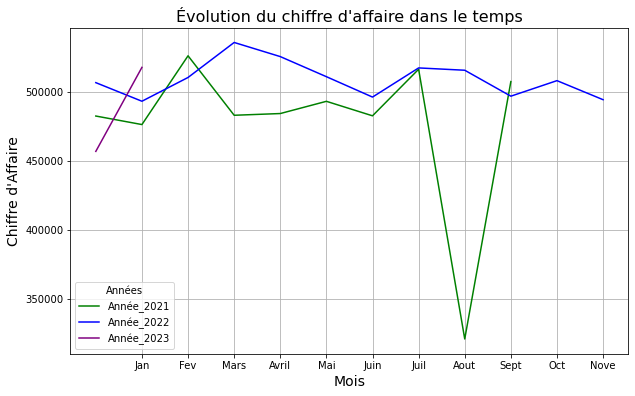

In [97]:
fig = plt.figure(1, figsize=(10, 6))
# Changer le nom des mois
positions = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels = ("Jan", "Fev", "Mars", "Avril", "Mai", "Juin", "Juil", "Aout", "Sept", "Oct", "Nove", "Dece")
plt.xticks(positions, labels)
#plot individual lines with custom colors and labels
plt.plot(df_2021_group['CA'], label='Année_2021', color='green')
plt.plot(df_2022_group['CA'], label='Année_2022', color='blue')
plt.plot(df_2023_group['CA'], label='Année_2023', color='purple')

#add legend
plt.legend(title='Années')

#add axes labels and a title
plt.ylabel("Chiffre d'Affaire", fontsize=14)
plt.xlabel('Mois', fontsize=14)
plt.title("Évolution du chiffre d'affaire dans le temps", fontsize=16)

plt.grid()

#display plot
plt.show()

## CA et nombre de ventes par mois

In [98]:
df_final.head(2)

,id_prod,date,session_id,client_id,année,mois,jour,heure,année_mois_jour,année_mois,prix,categ,genre,age
480501,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,Mars,1,0,2021-03-01,2021-03,11.99,0,f,54
428350,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021,Mars,1,0,2021-03-01,2021-03,19.37,0,m,61


In [99]:
df_ca_year_month = df_final.pivot_table(values="prix", index="année_mois", aggfunc=sum)
df_ca_year_month.rename(columns={"prix":"CA_par_mois"}, inplace = True)

In [100]:
df_ca_year_month.head(2)

,CA_par_mois
année_mois,
2021-03,482440.61
2021-04,476109.30


In [101]:
df_nbr_ven_per_year_month= df_final.pivot_table(values = "id_prod", index = "année_mois", aggfunc='count')
df_nbr_ven_per_year_month.rename(columns={"id_prod":"nbr_ventes"}, inplace = True)

In [102]:
df_nbr_ven_per_year_month.head(2)

,nbr_ventes
année_mois,
2021-03,28601
2021-04,28443


## Representation Graphique

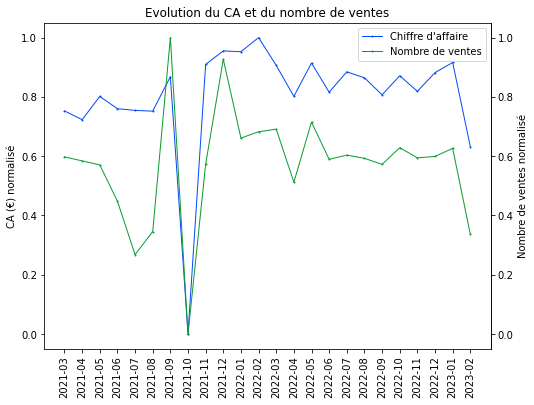

In [103]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
y = (df_ca_year_month["CA_par_mois"]-df_ca_year_month["CA_par_mois"].min())/(df_ca_year_month["CA_par_mois"].max()-df_ca_year_month["CA_par_mois"].min())
y2 = (df_nbr_ven_per_year_month["nbr_ventes"]-df_nbr_ven_per_year_month["nbr_ventes"].min())/(df_nbr_ven_per_year_month["nbr_ventes"].max()-df_nbr_ven_per_year_month["nbr_ventes"].min())
ax.plot(y, "o-", color='#0349fc',  linewidth = 1, markersize=1, label = "Chiffre d'affaire")
ax.plot(y2, "o-", color='#0c9c30',  linewidth = 1, markersize=1, label = "Nombre de ventes")
ax.set_title("Evolution du CA et du nombre de ventes")
ax.set_ylabel("CA (€) normalisé")
tick_positions = df_ca_year_month.index
ax.set_xticks(tick_positions)
ax.set_xticklabels(df_final['année_mois'].unique(), rotation = 90)
secax = ax.secondary_yaxis("right")
secax.set_ylabel('Nombre de ventes normalisé')
#ax.grid(True)
plt.legend()
plt.show()

### Étude des ventes du mois d'octobre 2021

In [104]:
df_ca.head()

,id_prod,session_id,client_id,année_mois_jour,année,mois,jour,prix,categ,age,genre
480501,0_1259,s_1,c_329,2021-03-01,2021,Mars,1,11.99,0,54,f
428350,0_1390,s_2,c_664,2021-03-01,2021,Mars,1,19.37,0,61,m
462563,0_1352,s_3,c_580,2021-03-01,2021,Mars,1,4.50,0,33,m
488153,0_1458,s_4,c_7912,2021-03-01,2021,Mars,1,6.55,0,32,f
438944,0_1358,s_5,c_2033,2021-03-01,2021,Mars,1,16.49,0,65,f


In [105]:
mask_2021_10 = (df_ca["mois"]  == "Octobre") & (df_ca["année"] == 2021)
df_2021_Oct = df_ca[mask_2021_10]

In [106]:
df_2021_Oct

,id_prod,session_id,client_id,année_mois_jour,année,mois,jour,prix,categ,age,genre
393773,0_1145,s_98170,c_5907,2021-10-01,2021,Octobre,1,6.99,0,30,f
47979,1_622,s_98169,c_7614,2021-10-01,2021,Octobre,1,17.41,1,26,m
342811,1_202,s_98171,c_4492,2021-10-01,2021,Octobre,1,19.96,1,41,f
15777,0_2268,s_98172,c_2588,2021-10-01,2021,Octobre,1,17.57,0,32,m
7427,0_1421,s_98173,c_5953,2021-10-01,2021,Octobre,1,19.99,0,35,m
...,...,...,...,...,...,...,...,...,...,...,...
313876,0_1108,s_112940,c_6259,2021-10-31,2021,Octobre,31,17.45,0,30,m
400818,1_414,s_112948,c_1609,2021-10-31,2021,Octobre,31,23.83,1,41,m
565939,0_1425,s_112949,c_1767,2021-10-31,2021,Octobre,31,12.99,0,38,f
459293,0_1745,s_112950,c_3320,2021-10-31,2021,Octobre,31,4.99,0,45,m


In [107]:
# projection id_prod, prix et categ
df_2021_Oct = df_2021_Oct[['année_mois_jour', 'prix', 'categ']]

In [108]:
df_2021_Oct

,année_mois_jour,prix,categ
393773,2021-10-01,6.99,0
47979,2021-10-01,17.41,1
342811,2021-10-01,19.96,1
15777,2021-10-01,17.57,0
7427,2021-10-01,19.99,0
...,...,...,...
313876,2021-10-31,17.45,0
400818,2021-10-31,23.83,1
565939,2021-10-31,12.99,0
459293,2021-10-31,4.99,0


In [109]:
df_ca_categorie_mois= df_2021_Oct.pivot_table(values = "prix", index = "année_mois_jour", columns = "categ", aggfunc=sum)

In [110]:
df_ca_categorie_mois

categ,0,1,2
année_mois_jour,,,
2021-10-01,6950.50,7003.79,3104.05
2021-10-02,7141.01,0.00,2041.12
2021-10-03,6786.57,0.00,2206.48
2021-10-04,6533.60,0.00,2746.08
2021-10-05,6357.91,0.00,3032.55
2021-10-06,7546.58,0.00,1944.11
2021-10-07,6404.01,0.00,1787.07
2021-10-08,7069.53,0.00,3137.82
2021-10-09,6808.69,0.00,2616.67


## Representation graphique

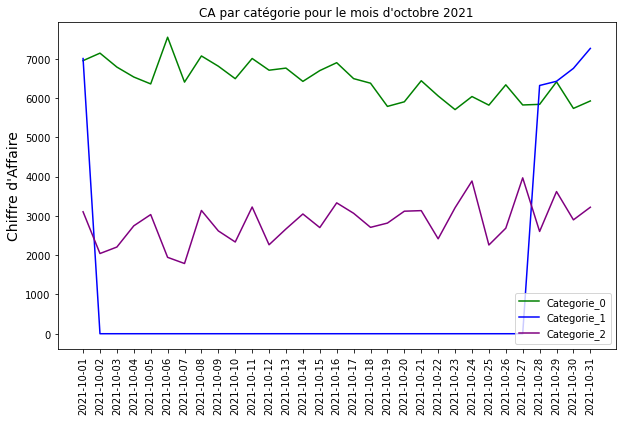

In [111]:
fig = plt.figure(figsize=(10,6))

plt.plot(df_ca_categorie_mois.index,df_ca_categorie_mois.iloc[:,0].values,color="green",label="Categorie_0")
plt.plot(df_ca_categorie_mois.index,df_ca_categorie_mois.iloc[:,1].values,color="blue",label="Categorie_1")
plt.plot(df_ca_categorie_mois.index,df_ca_categorie_mois.iloc[:,2].values,color="purple",label="Categorie_2")
plt.legend(["Categorie_0","Categorie_1","Categorie_2"],loc="lower right")

plt.title("CA par catégorie pour le mois d'octobre 2021")
plt.ylabel("Chiffre d'Affaire", fontsize=14)
tick_positions = df_ca_categorie_mois.index
#ax.set_xticks(tick_positions)
plt.xticks(rotation=90)
#plt.legend()
plt.show()

<h2 style="color:red;">Aucune vente des produits de la categorie_1 entre le mois de Février et Juin 2021 </h2>

<a id = "ca_repartition"></a>
<html><font color='#c97144', size = "+1.5"><strong>2.2  Répartition du CA </strong></font></html>

### CA et nombre de ventes par catégories

In [112]:
df_ca_categorie= df_final.pivot_table(values = "prix", index = "categ", aggfunc=sum)
df_ca_categorie.rename(columns={"prix":"CA"}, inplace = True)

In [113]:
df_ca_categorie

,CA
categ,
0,4.419731e+06
1,4.653723e+06
2,2.780275e+06


In [114]:
df_ventes_categorie= df_final.pivot_table(values = "id_prod", index = "categ", aggfunc="count")
df_ventes_categorie.rename(columns={"id_prod":"Nbr de ventes"}, inplace = True)

In [115]:
df_ca_categorie_annee= df_final.pivot_table(values = "prix", index = "categ", columns = "année", aggfunc=sum)

In [116]:
df_ventes_categorie_annee= df_final.pivot_table(values = "id_prod", index = "categ", columns = "année", aggfunc="count")

In [117]:
df_ca_categorie_mois= df_final.pivot_table(values = "prix", index = "année_mois", columns = "categ", aggfunc=sum)

In [118]:
df_ventes_categorie_mois= df_final.pivot_table(values = "id_prod", index = "année_mois", columns = "categ", aggfunc='count')

In [119]:
df_ca_client= df_final.pivot_table(values = "prix", index = "client_id", aggfunc=sum)
df_ca_client.rename(columns={"price":"CA"}, inplace = True)

In [120]:
df_ca_session= df_final.pivot_table(values = "prix", index = "session_id", aggfunc=sum)
df_ca_session.rename(columns={"price":"CA_Session"}, inplace = True)

## Graphique : CA par categorie et nombre de ventes par catégories

Text(0.5, 1.0, 'Nombre de ventes par catégorie (%)')

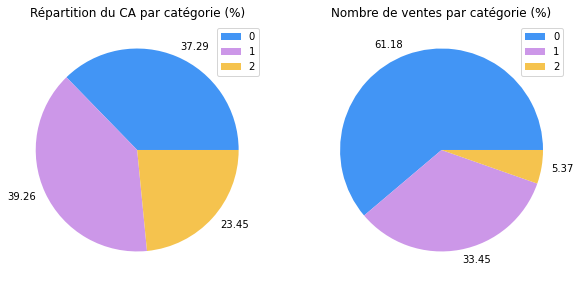

In [121]:
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.pie(df_ca_categorie["CA"], 
        labels =round(df_ca_categorie["CA"]/df_ca_categorie["CA"].sum()*100,2),
        colors = ['#4295f5','#cc97e8','#f5c34e'],
       )
ax.legend(df_ca_categorie.index, loc = "upper right")
ax.set_title("Répartition du CA par catégorie (%)")

ax2.pie(df_ventes_categorie["Nbr de ventes"], 
        labels =round(df_ventes_categorie["Nbr de ventes"]/df_ventes_categorie["Nbr de ventes"].sum()*100,2),
        colors = ['#4295f5','#cc97e8','#f5c34e'],
       )
ax2.legend(df_ventes_categorie.index, loc = "upper right")
ax2.set_title("Nombre de ventes par catégorie (%)")

## Graphique: CA par categorie et par mois

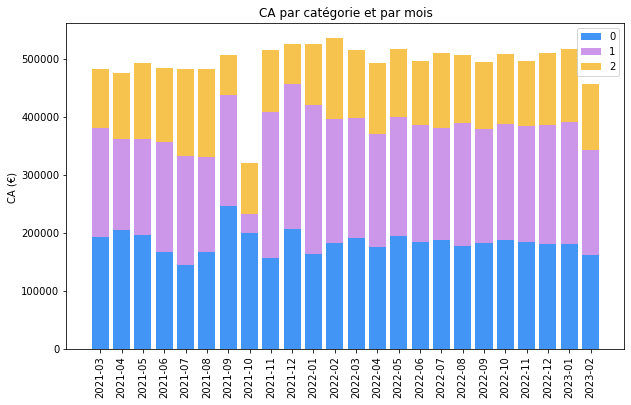

In [122]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.bar(df_ca_categorie_mois.index,df_ca_categorie_mois.iloc[:,0].values,color="#4295f5",label="0")
ax.bar(df_ca_categorie_mois.index,df_ca_categorie_mois.iloc[:,1].values,color="#cc97e8",bottom=np.array(df_ca_categorie_mois.iloc[:,0].values),label="1")
ax.bar(df_ca_categorie_mois.index,df_ca_categorie_mois.iloc[:,2].values,color="#f5c34e",bottom=(np.array(df_ca_categorie_mois.iloc[:,0].values)+np.array(df_ca_categorie_mois.iloc[:,1].values)),label="2")
ax.legend(["0","1","2"],loc="upper right")
ax.set_title("CA par catégorie et par mois")
ax.set_ylabel("CA (€) ")
tick_positions = df_ca_categorie_mois.index
ax.set_xticks(tick_positions)
ax.set_xticklabels(df_ca_categorie_mois.index, rotation = 90)
plt.legend()
plt.show()

## Graphique: Nombre de ventes par catégorie et par mois

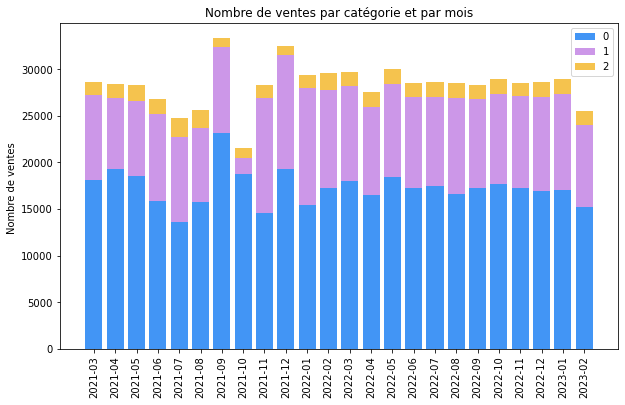

In [123]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.bar(df_ventes_categorie_mois.index,df_ventes_categorie_mois.iloc[:,0].values,color="#4295f5",label="0")
ax.bar(df_ventes_categorie_mois.index,df_ventes_categorie_mois.iloc[:,1].values,color="#cc97e8",bottom=np.array(df_ventes_categorie_mois.iloc[:,0].values),label="1")
ax.bar(df_ventes_categorie_mois.index,df_ventes_categorie_mois.iloc[:,2].values,color="#f5c34e",bottom=(np.array(df_ventes_categorie_mois.iloc[:,0].values)+np.array(df_ventes_categorie_mois.iloc[:,1].values)),label="2")
ax.legend(["0","2","1"],loc="upper right")
ax.set_title("Nombre de ventes par catégorie et par mois")
ax.set_ylabel("Nombre de ventes ")
tick_positions = df_ventes_categorie_mois.index
ax.set_xticks(tick_positions)
ax.set_xticklabels(df_ventes_categorie_mois.index, rotation = 90)
plt.legend()
plt.show()

## CA et nombre de ventes par produit

### CA par produit

In [124]:
df_ca_product= df_final.pivot_table(values = "prix", index = "id_prod", aggfunc=sum)
df_ca_product.rename(columns={"prix":"CA"}, inplace = True)

In [125]:
df_ca_product.describe()

,CA
count,3265.000000
mean,3630.544772
std,7371.925385
min,0.990000
25%,233.820000
50%,796.860000
75%,3408.600000
max,94893.500000


## Graohique: 

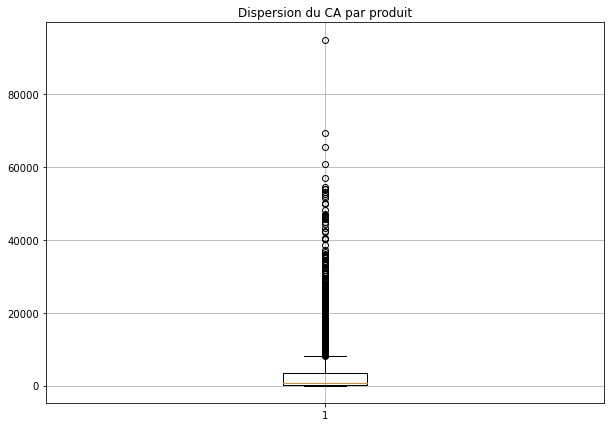

In [126]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
ax.boxplot(df_ca_product["CA"])
ax.set_title("Dispersion du CA par produit")
ax.grid(True)
plt.show()

## Nbre de ventes par produits

In [127]:
df_ventes_produit= df_final.pivot_table(values = "session_id", index = "id_prod", aggfunc="count")
df_ventes_produit.rename(columns={"session_id":"Nbr de ventes"}, inplace = True)

In [128]:
df_ventes_produit.describe()

,Nbr de ventes
count,3265.000000
mean,207.997243
std,331.361777
min,1.000000
25%,17.000000
50%,57.000000
75%,239.000000
max,2252.000000


## Graphique: Dispersion du nombre de ventes par produits

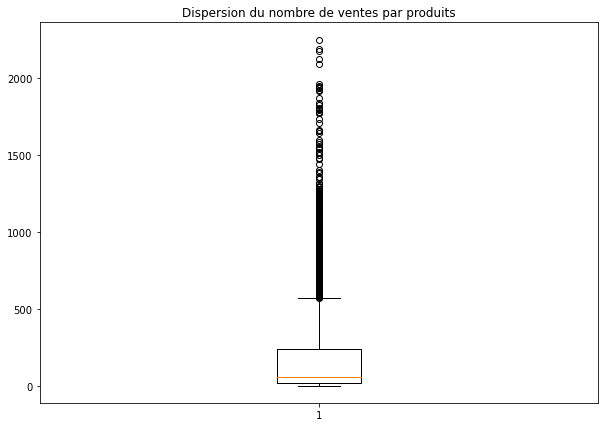

In [129]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
ax.boxplot(df_ventes_produit["Nbr de ventes"])
ax.set_title("Dispersion du nombre de ventes par produits")
plt.show()

## Top 10 : nombre de ventes et CA généré

In [130]:
df_ventes_produit.sort_values(by = "Nbr de ventes", ascending=False).head(10)

,Nbr de ventes
id_prod,
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
1_403,1960
1_412,1951
1_413,1945
1_406,1939


In [131]:
df_ca_product.sort_values(by = "CA", ascending=False).head(10)

,CA
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


### produits ne s'étant pas vendus

In [132]:
df_diff = set(df_products["id_prod"].to_list()) - set(df_transactions["id_prod"].to_list())

In [133]:
len(df_diff)

21

In [134]:
df_diff

{'0_1014',
 '0_1016',
 '0_1025',
 '0_1062',
 '0_1119',
 '0_1318',
 '0_1620',
 '0_1624',
 '0_1645',
 '0_1780',
 '0_1800',
 '0_2308',
 '0_299',
 '0_310',
 '0_322',
 '0_510',
 '1_0',
 '1_394',
 '2_72',
 '2_86',
 '2_87'}

## les produits vendus 1 fois

In [135]:
df_ventes_produit[df_ventes_produit["Nbr de ventes"]==1]

,Nbr de ventes
id_prod,
0_1151,1
0_1284,1
0_1379,1
0_1498,1
0_1539,1
0_1601,1
0_1633,1
0_1683,1
0_1728,1


### Valeurs Aberrantes
### Étude de la dispertion des CA par client : Les clients outliers 

In [136]:
df_ca_client= df_final.pivot_table(values = "prix", index = "client_id", aggfunc=sum)

In [137]:
df_ca_client.sort_values(by = "prix", ascending=False, inplace=True)

In [138]:
df_ca_client.rename(columns={"prix":"CA"}, inplace = True)

In [139]:
df_ca_client

,CA
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153598.92
c_3454,113637.93
c_3263,5276.87
...,...
c_4648,11.20
c_240,11.06
c_8114,9.98


<html>
<font color='blue', size = "+1">Une valeur est aberrante si:
    valeur < Q1 -1.5 * IQR 
    ou 
    valeur > Q3 + 1,5 * IQR
       
</font>
</html>

In [140]:
boxplotstats = cbk.boxplot_stats(df_ca_client["CA"])

In [141]:
Q1 = df_ca_client["CA"].quantile(0.25)
Q3 = df_ca_client["CA"].quantile(0.75)
IQ = Q3-Q1

In [142]:
print(round(IQ, 2))

1231.87


In [143]:
limite_inf = Q1-1.5*IQ
limite_sup = Q3+1.5*IQ

In [144]:
print("limite_inférieure = ", round(limite_inf,2))
print("limite_superieure = ", round(limite_sup, 2))

limite_inférieure =  -1300.17
limite_superieure =  3627.3


In [145]:
mask = (df_ca_client["CA"]<limite_inf) | (df_ca_client["CA"]>limite_sup)
df_liste_valeurs_aberrantes_méthode_IQR = df_ca_client[mask]["CA"]

In [146]:
print(f"Nombre de valeurs aberrantes détectés, méthode IQR = {len(df_liste_valeurs_aberrantes_méthode_IQR)}")

Nombre de valeurs aberrantes détectés, méthode IQR = 246


<html><font color='blue', size = "+1"><strong>Liste des valeurs aberrantes </strong></font></html>

In [147]:
df_clients_outliers = df_ca_client[(df_ca_client["CA"]<boxplotstats[0]["whislo"]) | (df_ca_client["CA"]>boxplotstats[0]["whishi"])].sort_values(by = "CA", ascending = False)

In [148]:
df_clients_outliers

,CA
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153598.92
c_3454,113637.93
c_3263,5276.87
...,...
c_4101,3638.13
c_4557,3636.35
c_6182,3634.58


In [149]:
df_clients_outliers.shape

(246, 1)

## Graphique

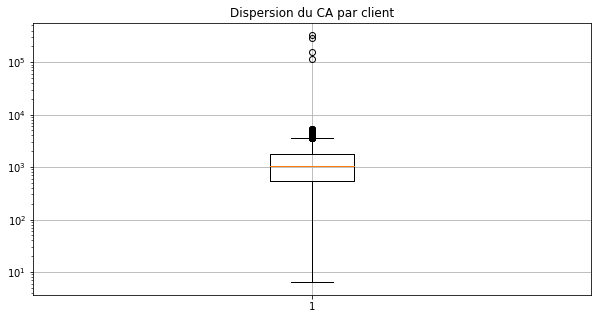

In [150]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.boxplot(df_ca_client["CA"])
ax.set_title("Dispersion du CA par client")
ax.grid(True)
ax.set_yscale('log')
plt.show()

## Par age

In [151]:
df_final.head()

,id_prod,date,session_id,client_id,année,mois,jour,heure,année_mois_jour,année_mois,prix,categ,genre,age
480501,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,Mars,1,0,2021-03-01,2021-03,11.99,0,f,54
428350,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021,Mars,1,0,2021-03-01,2021-03,19.37,0,m,61
462563,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021,Mars,1,0,2021-03-01,2021-03,4.50,0,m,33
488153,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021,Mars,1,0,2021-03-01,2021-03,6.55,0,f,32
438944,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021,Mars,1,0,2021-03-01,2021-03,16.49,0,f,65


In [152]:
customers_unique = df_final.drop_duplicates(subset="client_id", keep="first")
customers_unique.describe()["age"]

count    8600.000000
mean       42.739302
std        16.908755
min        17.000000
25%        29.000000
50%        42.000000
75%        55.000000
max        92.000000
Name: age, dtype: float64

## Graphique: dispertion selon le genre

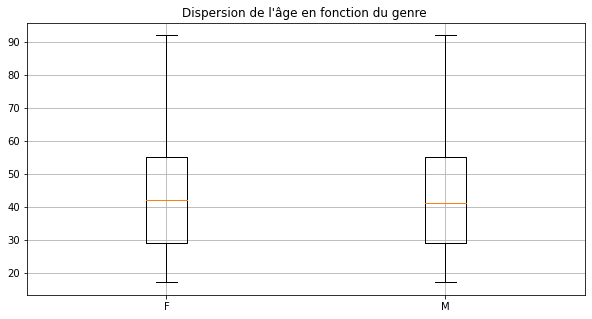

In [153]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.boxplot(customers_unique[customers_unique["genre"]== "f"]["age"],  positions=[1])
ax.boxplot(customers_unique[customers_unique["genre"]== "m"]["age"],  positions=[2])
ax.set_title("Dispersion de l'âge en fonction du genre ")
ax.set_xticklabels(['F', 'M'])
ax.grid(True)

plt.show()

## Étude selon le nombre de sessions

In [154]:
df_sans_doublons_sessions = df_final.drop_duplicates(subset="session_id", keep='first', ignore_index=True)

In [155]:
df_sans_doublons_sessions.head()

,id_prod,date,session_id,client_id,année,mois,jour,heure,année_mois_jour,année_mois,prix,categ,genre,age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,Mars,1,0,2021-03-01,2021-03,11.99,0,f,54
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021,Mars,1,0,2021-03-01,2021-03,19.37,0,m,61
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021,Mars,1,0,2021-03-01,2021-03,4.50,0,m,33
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021,Mars,1,0,2021-03-01,2021-03,6.55,0,f,32
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021,Mars,1,0,2021-03-01,2021-03,16.49,0,f,65


## Nombre de session par mois

In [156]:
df_sessions_par_mois= df_sans_doublons_sessions.pivot_table(values = "session_id", index = "année_mois", aggfunc='count')
df_sessions_par_mois.rename(columns={"session_id":"nombre de sessions"}, inplace = True)
df_sessions_par_mois

,nombre de sessions
année_mois,
2021-03,14201
2021-04,13966
2021-05,14163
2021-06,13834
2021-07,13565
2021-08,13584
2021-09,14845
2021-10,11548
2021-11,14601


## Nombre de session par mois par genre

In [157]:
df_sessions_par_mois_par_genre= df_sans_doublons_sessions.pivot_table(values = "session_id", index = "année_mois", columns = "genre", aggfunc='count')

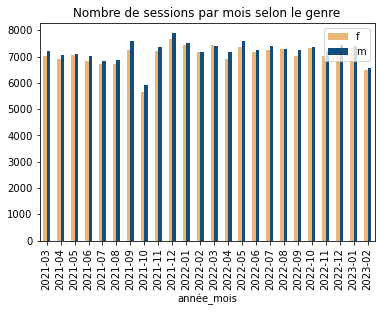

In [158]:
df_sessions_par_mois_par_genre.plot(kind="bar", color = ["#eab676","#154c79"], legend = None, title = "Nombre de sessions par mois selon le genre")
plt.legend()
plt.show()

In [159]:
df_sessions_par_client_total_par_mois= df_sans_doublons_sessions.pivot_table(values = "session_id", index = "client_id", columns = "année_mois", aggfunc='count')
df_sessions_par_mois.rename(columns={"session_id":"nombre de sessions"}, inplace = True)


In [160]:
df_sessions_par_mois.head()

,nombre de sessions
année_mois,
2021-03,14201
2021-04,13966
2021-05,14163
2021-06,13834
2021-07,13565


In [161]:
df_sessions_par_mois.reset_index(inplace=True)

In [162]:
df_sessions_par_mois.head()

,année_mois,nombre de sessions
0,2021-03,14201
1,2021-04,13966
2,2021-05,14163
3,2021-06,13834
4,2021-07,13565


## Graphique Nombre de sessions par mois

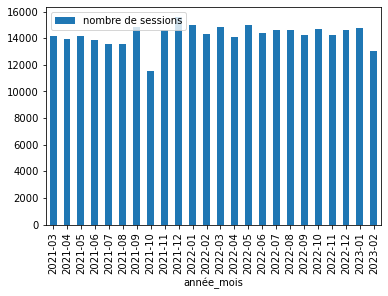

In [163]:
ax = df_sessions_par_mois.plot.bar(x='année_mois', rot=90)

## Panier Moyen

### Montant total du panier par session

In [164]:
df_panier_montants = df_final.pivot_table(values = "prix", index = ["client_id","session_id"], aggfunc=sum)
df_panier_montants.rename(columns={"prix":"montant du panier par session"}, inplace = True)

In [165]:
df_panier_montants

montant du panier par session
client_id session_id                               
c_1       s_105105                             7.99
          s_114737                            92.62
          s_120172                            44.29
          s_134971                            10.30
          s_136532                            13.78
...                                             ...
c_999     s_88239                             15.99
          s_89648                              5.99
          s_92374                              8.57
          s_98289                             11.99
          s_99070                              7.98

[342275 rows x 1 columns]

## Montant moyen du panier par client

In [166]:
df_panier_moyen_par_client = df_panier_montants.groupby("client_id").mean()
df_panier_moyen_par_client = pd.merge(df_panier_moyen_par_client,df_customers_F,how="left",on="client_id")
df_panier_moyen_par_client.rename(columns={"montant du panier par session":"panier moyen"}, inplace = True)

In [167]:
df_panier_moyen_par_client.head()

,client_id,panier moyen,genre,age
0,c_1,16.914545,m,66
1,c_10,39.811765,m,65
2,c_100,50.970000,m,29
3,c_1000,24.321398,f,55
4,c_1001,38.571489,m,39


### Graphique: Dispersion des paniers moyens en fonction du genre

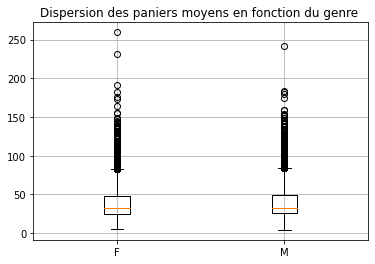

In [168]:
fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot(df_panier_moyen_par_client[df_panier_moyen_par_client["genre"]=="f"]["panier moyen"],  positions=[1])
ax.boxplot(df_panier_moyen_par_client[df_panier_moyen_par_client["genre"]=="m"]["panier moyen"],  positions=[2])
ax.set_title("Dispersion des paniers moyens en fonction du genre ")
ax.set_xticklabels(['F', 'M'])
ax.grid(True)
plt.show()

<a id = "ca_graphique"></a>
<html><font color='#c97144', size = "+1.5"><strong>2.3 Courbe de Lorenz et mesure d'inégalité de répartition au moyen du coefficient de Gini</strong></font></html>

In [169]:
df_ca_client= df_final.pivot_table(values = "prix", index = ["client_id"], aggfunc=sum)
df_ca_client.rename(columns={"prix":"CA"}, inplace = True)
df_ca_client.describe()

,CA
count,8600.000000
mean,1378.340544
std,5182.542488
min,6.310000
25%,547.630000
50%,1027.020000
75%,1779.500000
max,324033.350000


In [170]:
CA = df_ca_client["CA"]
n = len(CA)
lorenz = np.cumsum(np.sort(CA)) / CA.sum()
lorenz = np.append([0],lorenz)

## Graphique: 

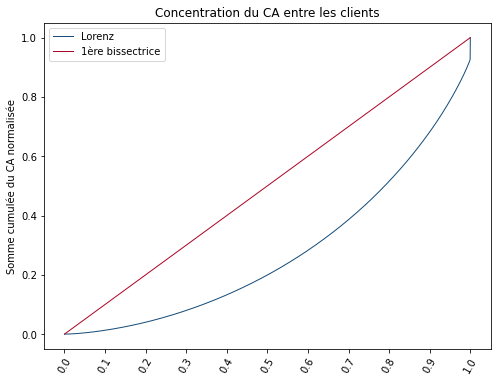

In [171]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.plot(np.linspace(0,1,n+1),lorenz,color='#154c79',  linewidth = 1, label = "Lorenz" )
ax.plot(np.linspace(0,1,n+1),np.linspace(0,1,n+1),color='#ad0728',  linewidth = 1, label = "1ère bissectrice" )
ax.set_title("Concentration du CA entre les clients")
ax.set_ylabel("Somme cumulée du CA normalisée")
tick_positions =[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 60)
plt.legend()
plt.show()

In [172]:
lor_50 = np.interp(0.5, lorenz, np.linspace(0,1,n+1))

In [173]:
#50% du CA est concentré par 21% des plus gros clients 
print('50% du CA est concentré par ', round((1-lor_50)*100, 0),'% des plus gros clients ')

50% du CA est concentré par  21.0 % des plus gros clients 


In [174]:
lor_80 = np.interp(0.8, lorenz, np.linspace(0,1,n+1))
#80% du CA est concentré par 4% des plus gros clients 

In [175]:
print('80% du CA est concentré par ', round((1-lor_80)*100, 0),'% des plus gros clients ')

80% du CA est concentré par  4.0 % des plus gros clients 


## Indice de Gini mesure de l'inégalité des achats

In [176]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = round(2*S, 2)

In [177]:
gini

0.45

### Indice de Gini est de 0.45 donc le niveau d'inégalité pour la variable CA et sur la population des clients est moyenne ( plus IG est grand plus l'inégalité est grande)

<a id = "III"></a>
<html>
    <font color='brown', size = "+.8">
    <h1>III. Analyse bivariée pour interpréter les données et  test statistique</h1>
        <h2>Analyse ciblée</h2>
    </font>
    <li>Corrélation paramétrique: Elle mesure une dépendance linéaire entre deux variables (x et y) est connue sous le nom de test de corrélation paramétrique car elle dépend de la distribution des données.</li>
</html>

In [178]:
df_trans_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679332 non-null  object        
 1   date             679332 non-null  datetime64[ns]
 2   session_id       679332 non-null  object        
 3   client_id        679332 non-null  object        
 4   année            679332 non-null  int64         
 5   mois             679332 non-null  int64         
 6   jour             679332 non-null  int64         
 7   heure            679332 non-null  int64         
 8   année_mois_jour  679332 non-null  object        
 9   année_mois       679332 non-null  object        
 10  prix             679111 non-null  float64       
 11  categ            679111 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 62.8+ MB


In [179]:
df_trans_prod_cust = pd.merge(df_trans_prod, df_customers, on ="client_id", how = "left")

In [180]:
df_trans_prod_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679332 non-null  object        
 1   date             679332 non-null  datetime64[ns]
 2   session_id       679332 non-null  object        
 3   client_id        679332 non-null  object        
 4   année            679332 non-null  int64         
 5   mois             679332 non-null  int64         
 6   jour             679332 non-null  int64         
 7   heure            679332 non-null  int64         
 8   année_mois_jour  679332 non-null  object        
 9   année_mois       679332 non-null  object        
 10  prix             679111 non-null  float64       
 11  categ            679111 non-null  category      
 12  genre            679332 non-null  category      
 13  birth            679332 non-null  int64         
 14  age              679

In [181]:
df_trans_prod_cust['categ'].unique()

[0, 1, 2, NaN]
Categories (3, int64): [0, 1, 2]

In [182]:
df_trans_prod_cust['categ'].isna().sum() 

221

In [183]:
# remplacer les na par "autre"
#df_trans_prod_cust['categ'].fillna("Autre", inplace=True)

In [184]:
#df_trans_prod_cust['categ'].isna().sum() 

In [185]:
# remplacer les na par "autre"
#df_trans_prod_cust['categ'].fillna("Autre", inplace=True)

<a id = "corr_genre_categorie"></a>
<html><font color='#c97144', size = "+1.5"><h3>3.1 Corrélation entre le genre d’un client et les catégories des livres achetés</h3>
    </font>
        <font color='blue', size = "+.75">
    <p>Corrélation entre deux variables catégorielles : test du khi-deux deux variables qualitatives </p>
    <p>l’hypothèse nulle est « les deux variables testées sont indépendantes »</p></font></html>

In [186]:
df_corr_genre_categ =  df_trans_prod_cust[['genre', 'categ','prix']]

In [187]:
df_corr_genre_categ.head()

,genre,categ,prix
0,f,0,4.18
1,m,1,15.99
2,f,0,7.99
3,m,2,69.99
4,m,0,4.99


In [188]:
# separer le dataframe en deux df_f et df_m
mask_f = df_corr_genre_categ['genre'] == 'f'
mask_m = df_corr_genre_categ['genre'] == 'm'

df_f = df_corr_genre_categ[mask_f]
df_m = df_corr_genre_categ[mask_m]

In [189]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338402 entries, 0 to 679329
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   genre   338402 non-null  category
 1   categ   338285 non-null  category
 2   prix    338285 non-null  float64 
dtypes: category(2), float64(1)
memory usage: 5.8 MB


In [190]:
df_f.head()

,genre,categ,prix
0,f,0,4.18
2,f,0,7.99
5,f,0,8.57
7,f,0,7.04
8,f,0,12.79


In [191]:
df_corr_genre_categ.groupby(["categ", "genre"]).size().reset_index()

,categ,genre,0
0,0,f,206103
1,0,m,209356
2,1,f,114899
3,1,m,112270
4,2,f,17283
5,2,m,19200


## 1- construction du tableau de contingence, calcul de khi2
### estimer la dépendance entre deux caractères ( genre et categorie)

In [192]:
# Générer le tableau de contingence
X = "genre"
Y = "categ"
cont = df_corr_genre_categ[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)


In [193]:
cont

categ,0,1,2
genre,,,
f,206103,114899,17283
m,209356,112270,19200


In [194]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2 entries, f to m
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int32
 1   1       2 non-null      int32
 2   2       2 non-null      int32
dtypes: int32(3)
memory usage: 150.0 bytes


In [195]:
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(147.11906816131497, 2, 1.1310980597090762e-32)

## Graphique

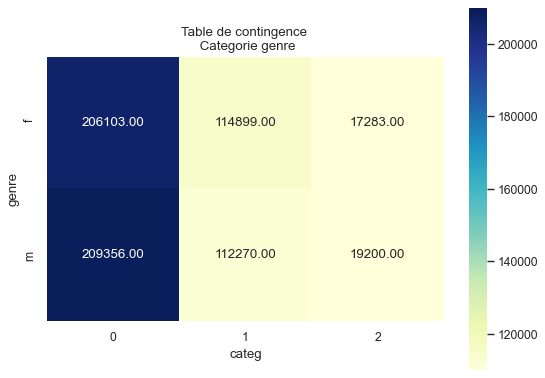

In [196]:
import seaborn as sns; sns.set()

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(cont, annot=True, fmt='.2f', cmap="YlGnBu", vmin=110000.0, vmax=210000.0)

plt.title('Table de contingence \n Categorie genre',fontsize=12)

# plt.savefig("table_Contingence_seaborn_matplotlib_1.png", bbox_inches='tight', dpi=100)

plt.show()

## 2- Calcul de la p-value

In [197]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [198]:
st_chi2

147.11906816131497

In [199]:
st_dof

2

In [200]:
st_exp

array([[206952.24759281, 113159.50583189,  18173.2465753 ],
       [208506.75240719, 114009.49416811,  18309.7534247 ]])

In [201]:
# Pvalue : l'unique valeur nécessaire pour prendre notre décision
st_p

1.1310980597090762e-32

## L’hypothèse nulle est que les variables genre et categorie sont indépendantes
## Rejetons l’hypothèse nulle au seuil de 5%, donc pour une pvaleur inférieure à 0.05
## On peut donc rejeter l’hypothèse nulle. Les variables « genre » et « categorie » sont dépendantes.

<a id = "corr_age_montant"></a>
<html><font color='#c97144', size = "+1.5"><h3>3.2 Corrélation entre l'age et le montant total des achats </h3>
    </font>
    <font color='blue', size = "+.75">
    <p>Corrélation entre deux variables continues (quantitatives): le test de corrélation de Pearson</p>
    <p>l’hypothèse nulle est  « les deux variables testées sont indépendantes »</p>
    </font></html>

### Noter:

<li>r prend une valeur comprise entre -1 (corrélation négative) et 1 (corrélation positive).</li>
<li>r = 0 signifie aucune corrélation.</li>
<li>Ne peut pas être appliqué aux variables ordinales.</li>
<li>La taille de l’échantillon doit être modérée (20-30) pour une bonne estimation.</li>
<li>Les valeurs aberrantes peuvent conduire à des valeurs trompeuses, ce qui signifie non robuste avec les valeurs aberrantes.</li>

In [202]:
ca_per_client =  df_trans_prod_cust[['client_id', 'age','prix']]

In [203]:
ca_per_client_sum = ca_per_client.groupby("age").sum()

In [204]:
ca_per_age_sum = ca_per_client.rename(columns={"prix":"CA_par_age"})

In [205]:
ca_per_age_sum.reset_index(inplace = True)

In [206]:
ca_per_age_sum

,index,client_id,age,CA_par_age
0,0,c_103,35,4.18
1,1,c_8534,33,15.99
2,2,c_6714,53,7.99
3,3,c_6941,21,69.99
4,4,c_4232,41,4.99
...,...,...,...,...
679327,679327,c_8489,70,12.99
679328,679328,c_4370,44,10.99
679329,679329,c_304,33,12.99
679330,679330,c_2227,35,4.98


## Graphique

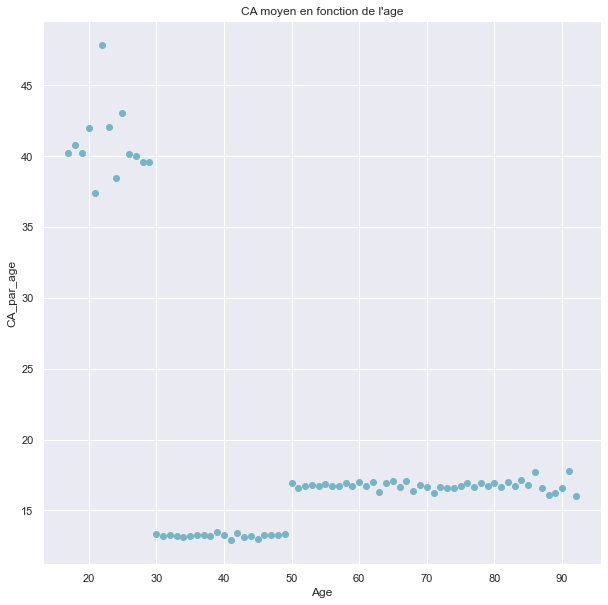

In [207]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(ca_per_age_sum.groupby("age").mean().index, ca_per_age_sum.groupby("age").mean()["CA_par_age"], color = "#76b5c5")
ax.set_title("CA moyen en fonction de l'age")
ax.set_ylabel("CA_par_age")
ax.set_xlabel("Age")
plt.grid(True)
plt.show()

In [208]:
df_trans_prod_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679332 non-null  object        
 1   date             679332 non-null  datetime64[ns]
 2   session_id       679332 non-null  object        
 3   client_id        679332 non-null  object        
 4   année            679332 non-null  int64         
 5   mois             679332 non-null  int64         
 6   jour             679332 non-null  int64         
 7   heure            679332 non-null  int64         
 8   année_mois_jour  679332 non-null  object        
 9   année_mois       679332 non-null  object        
 10  prix             679111 non-null  float64       
 11  categ            679111 non-null  category      
 12  genre            679332 non-null  category      
 13  birth            679332 non-null  int64         
 14  age              679

In [209]:
df_corr_age_montant =  df_trans_prod_cust[['client_id', 'age','prix']]

In [210]:
df_corr_age_montant

,client_id,age,prix
0,c_103,35,4.18
1,c_8534,33,15.99
2,c_6714,53,7.99
3,c_6941,21,69.99
4,c_4232,41,4.99
...,...,...,...
679327,c_8489,70,12.99
679328,c_4370,44,10.99
679329,c_304,33,12.99
679330,c_2227,35,4.98


In [211]:
# Montant des achats par age du client
df_corr_age_montant_agg = df_corr_age_montant.groupby(by=['age']).sum()

In [212]:
# Rename column price
df_corr_age_montant_agg = df_corr_age_montant_agg.rename(columns={'prix': 'Montant'})

In [213]:
df_corr_age_montant_agg

,Montant
age,
17,609013.69
18,178195.78
19,184177.35
20,178497.70
21,165007.98
...,...
88,5254.35
89,5043.19
90,2815.45


In [214]:
df_corr_age_montant_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 17 to 92
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Montant  76 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [215]:
# reinitialiser l'index
df_corr_age_montant_agg.reset_index(level=0, inplace=True)

In [216]:
df_corr_age_montant_agg

,age,Montant
0,17,609013.69
1,18,178195.78
2,19,184177.35
3,20,178497.70
4,21,165007.98
...,...,...
71,88,5254.35
72,89,5043.19
73,90,2815.45
74,91,4013.87


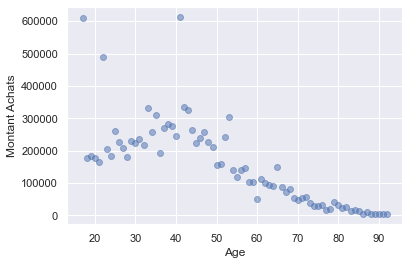

In [217]:
plt.plot(df_corr_age_montant_agg["age"], df_corr_age_montant_agg["Montant"],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Montant Achats")
plt.show()

In [218]:
list_age = df_corr_age_montant_agg['age'] 
list_montant = df_corr_age_montant_agg['Montant'] 
  
corr, _ = st.pearsonr(list_age, list_montant) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: -0.779


### On a un coefficient de correlation negatif, plus l'age augmente, plus les valeurs du montant diminuent  
### le coefficient de correlation est de -0.779,  donc il y'a une correlation négative entre l'age est le montant d'achat

### On remarque qu'il ya trois tranches d'age
- **de 20 à 30 ans** 
- **de 30 à 50 ans**
- **de 50 à 90 ans**

<a id = "corr_age_frequence"></a>
<html><font color='#c97144', size = "+1.5"><h3>3.3 Corrélation entre l'age d’un client et la fréquence d’achat</h3></font>
 <font color='blue', size = "+.75">
    <p>Corrélation entre deux variables continues : le test de corrélation de Pearson</p>
    <p>l’hypothèse nulle est  « les deux variables testées sont indépendantes »</p>
    </font>

## le nombre d'achats réalisé par un client sur une période 

In [219]:
df_ca_session.head()

,prix
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49


In [220]:
df_ca_session.reset_index(inplace=True)

In [221]:
df_ca_session.head()

,session_id,prix
0,s_1,11.99
1,s_10,26.99
2,s_100,33.72
3,s_1000,39.22
4,s_10000,41.49


In [222]:
df_ca_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342275 entries, 0 to 342274
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  342275 non-null  object 
 1   prix        342275 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.2+ MB


In [223]:
df_ca_session['session_id'].nunique()

342275

In [224]:
sessions_per_client = pd.merge(df_ca_session,df_final,on="session_id")

In [225]:
sessions_per_client.head()

,session_id,prix_x,id_prod,date,client_id,année,mois,jour,heure,année_mois_jour,année_mois,prix_y,categ,genre,age
0,s_1,11.99,0_1259,2021-03-01 00:01:07.843138,c_329,2021,Mars,1,0,2021-03-01,2021-03,11.99,0,f,54
1,s_10,26.99,1_635,2021-03-01 00:10:33.163037,c_2218,2021,Mars,1,0,2021-03-01,2021-03,26.99,1,f,51
2,s_100,33.72,0_1030,2021-03-01 04:12:43.572994,c_3854,2021,Mars,1,4,2021-03-01,2021-03,13.73,0,f,43
3,s_100,33.72,0_1451,2021-03-01 04:43:58.025677,c_3854,2021,Mars,1,4,2021-03-01,2021-03,19.99,0,f,43
4,s_1000,39.22,0_1625,2021-03-03 02:38:09.568389,c_1014,2021,Mars,3,2,2021-03-03,2021-03,5.99,0,m,32


In [226]:
sessions_per_client['client_id'].nunique()

8600

In [227]:
sessions_per_client['session_id'].nunique()

342275

In [228]:
df_age_client_session = sessions_per_client.loc[:, ['client_id', 'session_id', 'age']]

In [229]:
df_age_client_session.head()

,client_id,session_id,age
0,c_329,s_1,54
1,c_2218,s_10,51
2,c_3854,s_100,43
3,c_3854,s_100,43
4,c_1014,s_1000,32


In [230]:
# extraire client age
client_age = df_age_client_session.loc[:, ['client_id', 'age']]

In [231]:
df_age_client_session_agg = df_age_client_session.pivot_table(values = "session_id", index = "client_id", aggfunc = "count")


In [232]:
df_age_client_session_agg.head()

,session_id
client_id,
c_1,39
c_10,58
c_100,8
c_1000,125
c_1001,102


In [233]:
df_age_client_session_agg.reset_index(inplace = True)

In [234]:
df_age_client_session_agg

,client_id,session_id
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102
...,...,...
8595,c_995,14
8596,c_996,95
8597,c_997,59
8598,c_998,53


In [235]:
client_age

,client_id,age
0,c_329,54
1,c_2218,51
2,c_3854,43
3,c_3854,43
4,c_1014,32
...,...,...
679106,c_4900,47
679107,c_3521,42
679108,c_2795,43
679109,c_2795,43


In [236]:
client_age['client_id'].nunique()

8600

In [237]:
# Supprimer les doublons
client_age.drop_duplicates(subset ="client_id", keep = 'first', inplace=True)

In [238]:
client_age

,client_id,age
0,c_329,54
1,c_2218,51
2,c_3854,43
4,c_1014,32
8,c_476,32
...,...,...
619488,c_3486,62
620916,c_1909,22
643673,c_5962,24
655910,c_4478,51


In [239]:
# merge client_id ===> age
df_age_client_session_agg = pd.merge(df_age_client_session_agg, client_age, how="inner", on="client_id")

In [240]:
df_age_client_session_agg

,client_id,session_id,age
0,c_1,39,66
1,c_10,58,65
2,c_100,8,29
3,c_1000,125,55
4,c_1001,102,39
...,...,...,...
8595,c_995,14,66
8596,c_996,95,51
8597,c_997,59,27
8598,c_998,53,20


In [241]:
# rename session_id
df_age_client_session_agg.rename(columns={'session_id':'Nombre_sessions'}, inplace = True)


In [242]:
df_age_client_session_agg

,client_id,Nombre_sessions,age
0,c_1,39,66
1,c_10,58,65
2,c_100,8,29
3,c_1000,125,55
4,c_1001,102,39
...,...,...,...
8595,c_995,14,66
8596,c_996,95,51
8597,c_997,59,27
8598,c_998,53,20


In [243]:
# Nombre total de sessions
Nbr_total_sessions = df_age_client_session_agg['Nombre_sessions'].sum()

In [244]:
Nbr_total_sessions

679111

In [245]:
# Ajout de la colonne frequence
df_age_client_session_agg['frequence %'] = round(df_age_client_session_agg['Nombre_sessions'] / Nbr_total_sessions * 100, 3)

In [246]:
df_age_client_session_agg

,client_id,Nombre_sessions,age,frequence %
0,c_1,39,66,0.006
1,c_10,58,65,0.009
2,c_100,8,29,0.001
3,c_1000,125,55,0.018
4,c_1001,102,39,0.015
...,...,...,...,...
8595,c_995,14,66,0.002
8596,c_996,95,51,0.014
8597,c_997,59,27,0.009
8598,c_998,53,20,0.008


In [247]:
# age et frequence 
df_age_frequence= df_age_client_session_agg.pivot_table(values = "frequence %", index = "age", aggfunc=sum)

In [248]:
df_age_frequence.head()

,frequence %
age,
17,2.244
18,0.640
19,0.678
20,0.629
21,0.647


In [249]:
df_age_frequence.reset_index(inplace=True)

In [250]:
df_age_frequence.head()

,age,frequence %
0,17,2.244
1,18,0.640
2,19,0.678
3,20,0.629
4,21,0.647


## Graphique

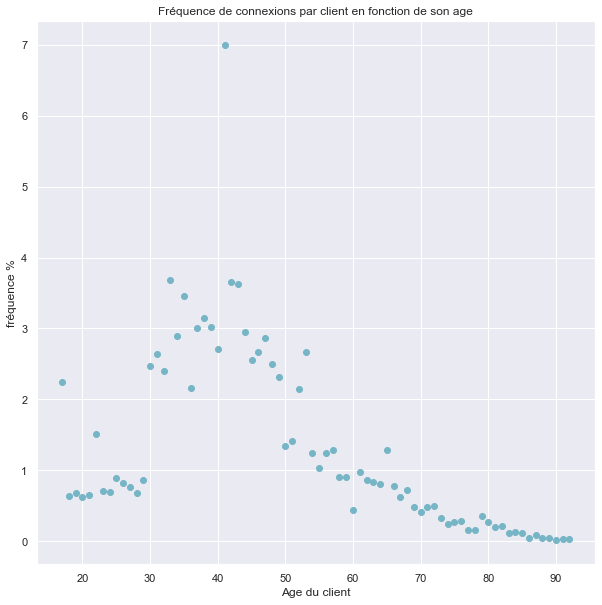

In [251]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(df_age_frequence['age'], df_age_frequence['frequence %'], color = "#76b5c5")
ax.set_title("Fréquence de connexions par client en fonction de son age")
ax.set_ylabel("fréquence %")
ax.set_xlabel("Age du client")
plt.grid(True)
plt.show()

In [252]:
list_age_ = df_age_frequence['age'] 
list_freq_ = df_age_frequence['frequence %'] 
  
corr, _ = st.pearsonr(list_age_, list_freq_) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: -0.534


In [253]:
st.pearsonr (list_age_, list_freq_)

(-0.5338121844582936, 6.846287547218809e-07)

### on a p_value est trop petite, donc on rejette l'hypothèse nulle, les deux variables age et frequence d'achat sont dependantes

<a id = "corr_age_panier"></a>
<html><font color='#c97144', size = "+1.5"><h3>3.4 Corrélation entre l'age d’un client et la taille du panier moyen</h3>
     <p>Corrélation entre 2 variables Quantitative : : le test de corrélation de Pearson</p>
     <p>Hypothèse null: les deux variables age et panier_moyen sont indépendantes</p>

In [254]:
# Calcul de la taille du panier moyen par age client
df_trans_prod_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679332 non-null  object        
 1   date             679332 non-null  datetime64[ns]
 2   session_id       679332 non-null  object        
 3   client_id        679332 non-null  object        
 4   année            679332 non-null  int64         
 5   mois             679332 non-null  int64         
 6   jour             679332 non-null  int64         
 7   heure            679332 non-null  int64         
 8   année_mois_jour  679332 non-null  object        
 9   année_mois       679332 non-null  object        
 10  prix             679111 non-null  float64       
 11  categ            679111 non-null  category      
 12  genre            679332 non-null  category      
 13  birth            679332 non-null  int64         
 14  age              679

In [255]:
df_age_panier = df_trans_prod_cust[['age', 'prix']]

In [256]:
df_age_panier

,age,prix
0,35,4.18
1,33,15.99
2,53,7.99
3,21,69.99
4,41,4.99
...,...,...
679327,70,12.99
679328,44,10.99
679329,33,12.99
679330,35,4.98


In [257]:
df_age_panier['panier'] = df_age_panier.groupby('age')['age'].transform('count')

<ipython-input-257-43f51e44ae72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_panier['panier'] = df_age_panier.groupby('age')['age'].transform('count')


In [258]:
df_age_panier

,age,prix,panier
0,35,4.18,23475
1,33,15.99,25005
2,53,7.99,18190
3,21,69.99,4415
4,41,4.99,47413
...,...,...,...
679327,70,12.99,2814
679328,44,10.99,19988
679329,33,12.99,25005
679330,35,4.98,23475


In [259]:
# Supprimer les doublons
df_age_panier.drop_duplicates(subset ="age", keep = 'first', inplace=True)


<ipython-input-259-03ca9ca46262>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_panier.drop_duplicates(subset ="age", keep = 'first', inplace=True)


In [260]:
df_age_panier = df_age_panier[['age', 'panier']]

In [261]:
df_age_panier

,age,panier
0,35,23475
1,33,25005
2,53,18190
3,21,4415
4,41,47413
...,...,...
1477,77,1069
1538,86,272
1948,88,327
5923,92,201


In [262]:
# panier moyen
#total_rows = df_age_panier['age'].count
#number_rows = df_age_panier['age'].value_counts 
total_rows = len(df_age_panier.index)
df_age_panier['panier_moyen'] = df_age_panier['panier']/ total_rows


In [263]:
df_age_panier

,age,panier,panier_moyen
0,35,23475,308.881579
1,33,25005,329.013158
2,53,18190,239.342105
3,21,4415,58.092105
4,41,47413,623.855263
...,...,...,...
1477,77,1069,14.065789
1538,86,272,3.578947
1948,88,327,4.302632
5923,92,201,2.644737


In [264]:
# df_age_panierMoyen
df_age_panier_moyen = df_age_panier[['age', 'panier_moyen']]

In [265]:
df_age_panier_moyen

,age,panier_moyen
0,35,308.881579
1,33,329.013158
2,53,239.342105
3,21,58.092105
4,41,623.855263
...,...,...
1477,77,14.065789
1538,86,3.578947
1948,88,4.302632
5923,92,2.644737


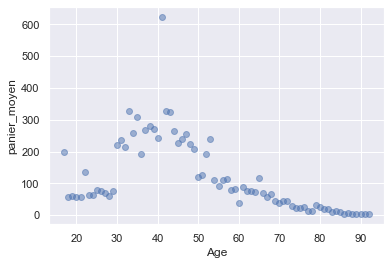

In [266]:
plt.plot(df_age_panier_moyen["age"], df_age_panier_moyen["panier_moyen"],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("panier_moyen")
plt.show()

In [267]:
list_age = df_age_panier_moyen['age'] 
list_panier_moyen = df_age_panier_moyen['panier_moyen'] 
  
corr_age_panier, _ = st.pearsonr(list_age, list_panier_moyen) 
print('Pearsons correlation: %.3f' % corr_age_panier) 

Pearsons correlation: -0.534


## ============================================

### Etude de la corrélation entre âge et panier moyen

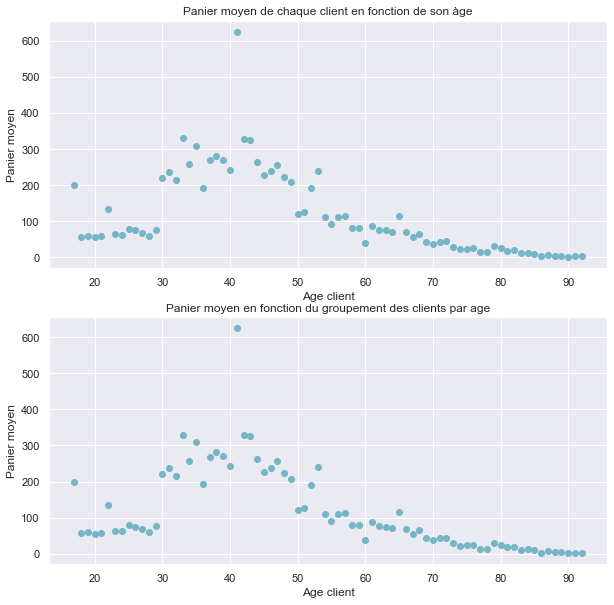

In [268]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax.scatter(df_age_panier_moyen["age"], df_age_panier_moyen["panier_moyen"], color = "#76b5c5")
ax.set_title("Panier moyen de chaque client en fonction de son àge")
ax.set_ylabel("Panier moyen")
ax.set_xlabel("Age client")
plt.grid(True)
ax2.scatter(df_age_panier_moyen.groupby("age").mean().index, df_age_panier_moyen.groupby("age").mean()["panier_moyen"], color = "#76b5c5")
ax2.set_title("Panier moyen en fonction du groupement des clients par age")
ax2.set_ylabel("Panier moyen")
ax2.set_xlabel("Age client")
plt.grid(True)
plt.show()


In [269]:
normaltest(df_age_panier_moyen["age"])

NormaltestResult(statistic=23.33269279340759, pvalue=8.577685837925247e-06)

In [270]:
normaltest(df_age_panier_moyen["panier_moyen"])

NormaltestResult(statistic=32.23566918890118, pvalue=1.0002610905859469e-07)

In [271]:
st.spearmanr(df_age_panier_moyen["age"], df_age_panier_moyen["panier_moyen"])

SpearmanrResult(correlation=-0.6846206425153794, pvalue=9.152883867240306e-12)

## p_value trop petite donc on rejette l'hypothèse nulle, donc les deux variable age et panier moyen sont dépendantes

<a id = "corr_age_achat"></a>
<html><font color='#c97144', size = "+1.5"><h3>3.5 Corrélation entre l'age d’un client et les catégories des livres achetés</h3>
    </font>
        <font color='blue', size = "+.75">
    <p>Corrélation entre une variable continue et une variable catégorielle :</p>
     <p>Corrélation entre une variable Quantitative et une variable Qualitative : Test de Student</p>
     <p>Hypothèse null: les deux variables age et categorie sont indépendantes</p>
    </font>

In [272]:
df_trans_prod_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679332 non-null  object        
 1   date             679332 non-null  datetime64[ns]
 2   session_id       679332 non-null  object        
 3   client_id        679332 non-null  object        
 4   année            679332 non-null  int64         
 5   mois             679332 non-null  int64         
 6   jour             679332 non-null  int64         
 7   heure            679332 non-null  int64         
 8   année_mois_jour  679332 non-null  object        
 9   année_mois       679332 non-null  object        
 10  prix             679111 non-null  float64       
 11  categ            679111 non-null  category      
 12  genre            679332 non-null  category      
 13  birth            679332 non-null  int64         
 14  age              679

In [273]:
df_age_categ = df_trans_prod_cust[['age', 'categ']]

In [274]:
df_age_categ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   age     679332 non-null  int64   
 1   categ   679111 non-null  category
dtypes: category(1), int64(1)
memory usage: 11.0 MB


In [275]:
df_age_categ.head()

,age,categ
0,35,0
1,33,1
2,53,0
3,21,2
4,41,0


In [276]:
df_age_categ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   age     679332 non-null  int64   
 1   categ   679111 non-null  category
dtypes: category(1), int64(1)
memory usage: 11.0 MB


In [277]:
df_age_categ

,age,categ
0,35,0
1,33,1
2,53,0
3,21,2
4,41,0
...,...,...
679327,70,0
679328,44,1
679329,33,0
679330,35,0


## Graphique

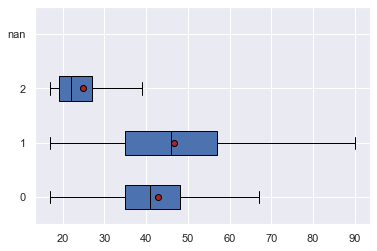

In [278]:
X = "categ" # qualitative
Y = "age" # quantitative

modalites = df_age_categ[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_age_categ[df_age_categ[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [279]:
# supprimer les enregistrements correspond à cat nan
df_age_categ['categ'] = df_age_categ['categ'].nunique(dropna = True,)

<ipython-input-279-860a8c91819b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_categ['categ'] = df_age_categ['categ'].nunique(dropna = True,)


In [280]:
# convert cat to int
df_age_categ['categ'] = df_age_categ['categ'].astype(int)

<ipython-input-280-cc27deb5125b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_categ['categ'] = df_age_categ['categ'].astype(int)


"""
X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    print(SCT)
    print(SCE)
    return SCE/SCT
eta_squared(df_age_categ[X],df_age_categ[Y])

"""

In [281]:
st.ttest_ind(df_age_categ['age'], df_age_categ['categ'])

Ttest_indResult(statistic=2440.1761542263525, pvalue=0.0)

In [282]:
st.ttest_ind(df_age_categ['age'], df_age_categ['categ']).pvalue/2

0.0

### on a pvalue=0 donc on rejete l'hypothèse nulle, donc les deux variables age et categorie sont dependantes

<a id = "proba"></a>
<html><font color='#c97144', size = "+1.5"><h3>3.6 Calcule de probabilité: qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159. (probabilité conditionnelle)</h3>
</font>

<h2> soit les deux évenements</h2> 
<li> A : Le client achete le produit 0_525</li>
<li> B : Le client achète le produit 2_159</li>
<p>La probabilité qu'un client achéte le produit 0_525 sachant qu’il a acheté la référence 2_159 : </p>
<strong> P(A/B) = P(A ∩ B) / P(B) </strong>

In [283]:
df_transactions_F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          679332 non-null  object        
 1   date             679332 non-null  datetime64[ns]
 2   session_id       679332 non-null  object        
 3   client_id        679332 non-null  object        
 4   année            679332 non-null  int64         
 5   mois             679332 non-null  int64         
 6   jour             679332 non-null  int64         
 7   heure            679332 non-null  int64         
 8   année_mois_jour  679332 non-null  object        
 9   année_mois       679332 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 57.0+ MB


In [284]:
# Evenement A : les clients qui ont acheté le produit 0_525
mask_prod_0525 = df_transactions_F['id_prod'] == '0_525'
df_prod_0525 = df_transactions_F[mask_prod_0525]

In [285]:
nbr_clients_prod_0_525 = df_prod_0525['client_id'].nunique()

In [286]:
# Évenement B : les clients qui ont acheté le produit 2_159
mask_prod_2159 = df_transactions_F['id_prod'] == '2_159'
df_prod_2159 = df_transactions_F[mask_prod_2159]

In [287]:
# Nombre clients qui ont acheté le produit 2_159
nbr_clients_prod_2_159 = df_prod_2159['client_id'].nunique()

In [288]:
print("Le nombre de clients qui ont acheté le produit 2_159 est ",nbr_clients_prod_2_159 )

Le nombre de clients qui ont acheté le produit 2_159 est  530


In [289]:
# les clients qui ont achetés les produits 0_525 et 2_159
# Calling merge() function
df_inter = pd.merge(df_prod_0525, df_prod_2159, how ='inner', on =['client_id'])
nbr_clients_inter = df_inter['client_id'].nunique()
print("Le nombre de clients qui ont acheté le produit 0_525 et le produit 2_159 est ",nbr_clients_inter )

Le nombre de clients qui ont acheté le produit 0_525 et le produit 2_159 est  459


##  P(A/B) =  P(A ∩ B) / P(B)

In [290]:
p = nbr_clients_inter / nbr_clients_prod_2_159

In [291]:
print(" La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 est de : %.2f" % p) 

 La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 est de : 0.87


<a id = "conclusion"></a>
<html><font color='brown', size = "+3"><strong><u> Conclusion</u></strong></font></html>

<html>
<ul>  
    <li>Le CA en 2021 est de 11 853 728, 68 euro </li>
    <li>On constate un pique du CA au mois de Aout 2021 </li>
    <li>On constate une chute de ventes en octobre 2021 </li>
    <li>On constate aucune vente de produits de la categorie 1 entre le mois de Février et Juin 2021 </li>
</ul>
<ul>
    <li> Pas de réelle différence de consommation entre les Hommes et les Femmes.</li>
    <li>Indice de Gini est de 0.45 donc le niveau d'inégalité entre le CA et et la population des clients est moyenne ( plus IG est grand plus l'inégalité est grande)</li>
    <li> Correlation négative entre l'age est le montant d'achat</li>
    <li>On peut donc rejeter l’hypothèse nulle. Les variables « genre » et « categorie » sont dépendantes.</li>
    <li>correlation négative entre l'age est le montant d'achat </li>
     <li>On remarque qu'il ya trois tranches d'age
            - **de 20 à 30 ans** 
            - **de 30 à 50 ans**
            - **de 50 à 90 ans** </li>
     <li>les deux variables age et frequence d'achat sont dependantes </li>
     <li>les deux variable age et panier moyen sont dépendantes.</li>
    <li> les deux variables age et categorie sont dependantes </li>
    <li> La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 est de : 0.87</li>
    
</ul>
</html>

<html><font color='brown', size = "+2"><strong><u> Recommandations</u></strong></font></html>

<li> Une segmentation efficace de la clientèle permet d'optimiser les ventes, avec une meilleur campagne publicitaire.</li>

<html><font color='brown', size = "+3"><strong><u> </u></strong></font></html>

<a href = "#Sommaire"> Retour au sommaire </a>